In [ ]:
# Install specific libraries
! pip install transformers
! pip install pycaret

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [ ]:
import numpy as np
import pandas as pd
import pycaret
from transformers import AutoModel, DistilBertTokenizerFast
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# specify GPU
device = torch.device("cuda")

# Load DistilBERT model and tokenizer
distilbert = AutoModel.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Mount Google Drive - applicable, if working on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set Working Directory - if working on Google Drive
%cd /content/drive/MyDrive/BERT

# # Set Working Directory - if working on Local Machine
# import os
# os.chdir('/Users//replace_me')

/content/drive/MyDrive/BERT


In [ ]:
# Load Dataset
true_data = pd.read_csv('true2.csv')
fake_data = pd.read_csv('fake2.csv')

# Generate labels True/Fake under new Target Column in 'true_data' and 'fake_data'
true_data['Target'] = ['True']*len(true_data)
fake_data['Target'] = ['Fake']*len(fake_data)

# Merge 'true_data' and 'fake_data', by random mixing into a single df called 'data'
data = pd.concat([true_data,fake_data]).sample(frac=1).reset_index().drop(columns=['index'])

# See how the data looks like
print(data.shape)
data.head()

(44898, 5)


,title,text,subject,date,Target
0,BUSTED: Trump’s Education Nominee Plagiarized...,How can we expect our kids to do their homewor...,News,"January 31, 2017",Fake
1,Ecuador president replaces vice president jail...,QUITO (Reuters) - Ecuador s president on Wedne...,worldnews,"October 4, 2017",True
2,"U.S. states, Rockefellers clash with U.S. Hous...",HOUSTON (Reuters) - With a number of U.S. stat...,politicsNews,"June 24, 2016",True
3,Myanmar ministers deliver aid to trapped Rohin...,YANGON (Reuters) - Two senior Myanmar governme...,worldnews,"September 29, 2017",True
4,HYSTERICAL! Maxine Waters for POTUS? “Oh no! W...,The hysterical Terrence Williams weighs in on ...,left-news,"Jul 21, 2017",Fake


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the 'Target' column
data['label'] = (data['Target'] == 'Fake').astype(int)


In [ ]:
data.head()

,title,text,subject,date,Target,label
0,BUSTED: Trump’s Education Nominee Plagiarized...,How can we expect our kids to do their homewor...,News,"January 31, 2017",Fake,1
1,Ecuador president replaces vice president jail...,QUITO (Reuters) - Ecuador s president on Wedne...,worldnews,"October 4, 2017",True,0
2,"U.S. states, Rockefellers clash with U.S. Hous...",HOUSTON (Reuters) - With a number of U.S. stat...,politicsNews,"June 24, 2016",True,0
3,Myanmar ministers deliver aid to trapped Rohin...,YANGON (Reuters) - Two senior Myanmar governme...,worldnews,"September 29, 2017",True,0
4,HYSTERICAL! Maxine Waters for POTUS? “Oh no! W...,The hysterical Terrence Williams weighs in on ...,left-news,"Jul 21, 2017",Fake,1


([<matplotlib.patches.Wedge at 0x7bc742f1e2c0>,
 [Text(-1.1968727067385088, -0.0865778485782335, 'Fake'),
  Text(1.1968726986325005, 0.08657796063754254, 'True')],
 [Text(-0.6981757455974634, -0.05050374500396954, '52.3%'),
  Text(0.6981757408689586, 0.05050381037189981, '47.7%')])

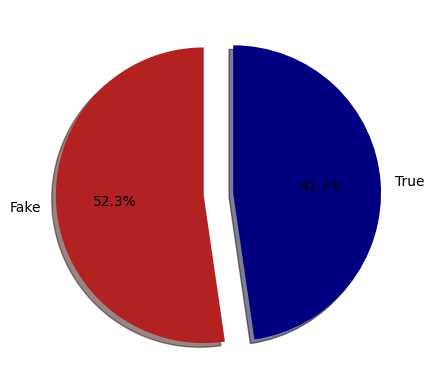

In [ ]:
# Checking if our data is well balanced
label_size = [data['label'].sum(),len(data['label'])-data['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

In [ ]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(data['title'], data['label'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=data['Target'])
# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

In [ ]:
from transformers import AutoModel, AutoTokenizer

# Load DistilBERT model and tokenizer
distilbert = AutoModel.from_pretrained('distilbert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')


Text(0, 0.5, 'Number of texts')

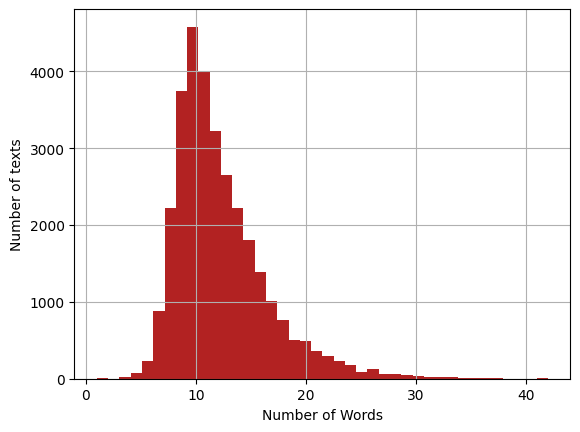

In [ ]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in train_text]

pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [ ]:

# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

sample_data = ["Build fake news model.",
               "Using DistilBERT."]                                        # sample data
tokenized_sample_data = tokenizer.batch_encode_plus(sample_data,
                                                    padding=True)        # encode text
print(tokenized_sample_data)


{'input_ids': [[101, 3857, 8275, 2739, 2944, 1012, 102], [101, 2478, 4487, 16643, 23373, 1012, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]}


In [ ]:


# Majority of titles above have word length under 15. So, we set max title length as 15
MAX_LENGTH = 15

# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length=MAX_LENGTH,
    pad_to_max_length=True,
    truncation=True
)

# Tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length=MAX_LENGTH,
    pad_to_max_length=True,
    truncation=True
)

# Tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length=MAX_LENGTH,
    pad_to_max_length=True,
    truncation=True
)


In [ ]:


# Convert lists to tensors for training set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# Convert lists to tensors for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# Convert lists to tensors for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32  # define a batch size

# Training DataLoader
train_data = TensorDataset(train_seq, train_mask, train_y)  # wrap tensors
train_sampler = RandomSampler(train_data)  # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
# dataLoader for train set

# Validation DataLoader
val_data = TensorDataset(val_seq, val_mask, val_y)  # wrap tensors
val_sampler = SequentialSampler(val_data)  # sampler for sampling the data during validation
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)
# dataLoader for validation set


In [ ]:
# Freezing the parameters
for param in distilbert.parameters():
    param.requires_grad = False


In [ ]:
from transformers import DistilBertModel, DistilBertTokenizer
import torch.nn as nn
from transformers import AdamW

# Load DistilBERT model and tokenizer
distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

class DistilBERT_Arch(nn.Module):
    def __init__(self, distilbert):
        super(DistilBERT_Arch, self).__init__()
        self.distilbert = distilbert
        self.dropout = nn.Dropout(0.1)            # dropout layer
        self.relu =  nn.ReLU()                    # relu activation function
        self.fc1 = nn.Linear(768, 512)            # dense layer 1
        self.fc2 = nn.Linear(512, 2)              # dense layer 2 (Output layer)
        self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function

    def forward(self, input_ids, attention_mask):
        output = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        cls_hs = output.last_hidden_state[:, 0, :]  # Using the [CLS] token's representation
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)                           # output layer
        x = self.softmax(x)                       # apply softmax activation
        return x

model = DistilBERT_Arch(distilbert)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Define the loss function
cross_entropy = nn.NLLLoss()

# Number of training epochs
epochs = 3


In [ ]:
import torch

def train(train_dataloader, model, optimizer, cross_entropy, device):
    model.train()
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
        batch = [r.to(device) for r in batch]  # push the batch to device
        sent_id, mask, labels = batch
        optimizer.zero_grad()  # clear previously calculated gradients
        preds = model(sent_id, attention_mask=mask)  # get model predictions for current batch
        loss = cross_entropy(preds, labels)  # compute loss between actual & predicted values
        total_loss += loss.item()  # add on to the total loss
        loss.backward()  # backward pass to calculate the gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # clip gradients to 1.0
        optimizer.step()  # update parameters

    avg_loss = total_loss / len(train_dataloader)  # compute training loss of the epoch
    return avg_loss


def evaluate(val_dataloader, model, cross_entropy, device):
    print("\nEvaluating...")
    model.eval()  # Deactivate dropout layers
    total_loss = 0
    for step, batch in enumerate(val_dataloader):
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
        batch = [t.to(device) for t in batch]  # Push the batch to device
        sent_id, mask, labels = batch
        with torch.no_grad():  # Deactivate autograd
            preds = model(sent_id, attention_mask=mask)  # Model predictions
            loss = cross_entropy(preds, labels)  # Compute the validation loss
            total_loss += loss.item()

    avg_loss = total_loss / len(val_dataloader)  # compute the validation loss of the epoch
    return avg_loss


In [ ]:
device = torch.device('cpu')

best_valid_loss = float('inf')  # Initialize with a large value
train_losses = []  # Initialize train loss list
valid_losses = []  # Initialize validation loss list

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train(train_dataloader, model, optimizer, cross_entropy, device)  # train model
    valid_loss = evaluate(val_dataloader, model, cross_entropy, device)  # evaluate model
    if valid_loss < best_valid_loss:  # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'distilbert_new_model_weights.pt')
    train_losses.append(train_loss)  # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')



 Epoch 1 / 3
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  Batch   650  of    983.
  Batch   700  of    983.
  Batch   750  of    983.
  Batch   800  of    983.
  Batch   850  of    983.
  Batch   900  of    983.
  Batch   950  of    983.

Evaluating...
  Batch    50  of    211.
  Batch   100  of    211.
  Batch   150  of    211.
  Batch   200  of    211.

Training Loss: 0.146
Validation Loss: 0.094

 Epoch 2 / 3
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  

In [ ]:
import torch

# Assuming you have previously defined and trained your model
# model = YourModelClass(...)

# Assuming test_seq and test_mask are your test data sequences and masks
with torch.no_grad():
    preds = model(test_seq, test_mask)
    preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis=1)
print(classification_report(test_y, preds))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3212
           1       0.99      0.97      0.98      3523

    accuracy                           0.98      6735
   macro avg       0.98      0.98      0.98      6735
weighted avg       0.98      0.98      0.98      6735



In [ ]:
# testing on unseen data
unseen_news_text = ["Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing",     # Fake
                    "WATCH: George W. Bush Calls Out Trump For Supporting White Supremacy",               # Fake
                    "U.S. lawmakers question businessman at 2016 Trump Tower meeting: sources",           # True
                    "Trump administration issues new rules on U.S. visa waivers"                          # True
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 15
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([1, 1, 0, 0])